In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [4]:
df = pd.read_csv("/content/Mall_Customers (1).csv")

In [5]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [7]:
le = LabelEncoder()
df['Genre'] = le.fit_transform(df['Genre'])
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [8]:
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

In [9]:
# Within Cluster Sum of Squares
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

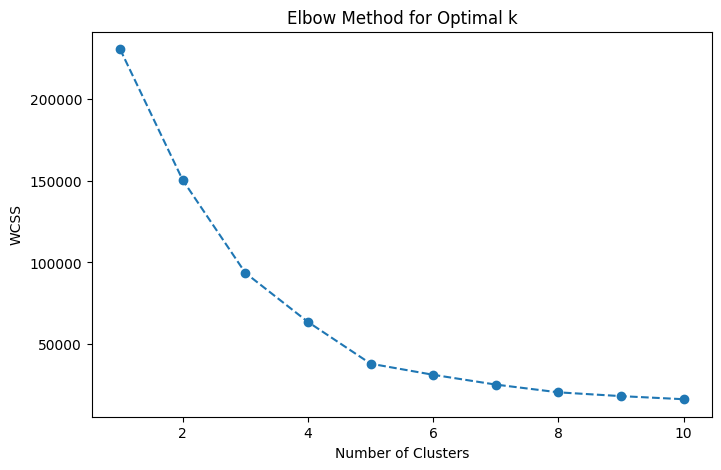

In [10]:
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()

In [11]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(X_train)
X_train['Cluster'] = kmeans.labels_

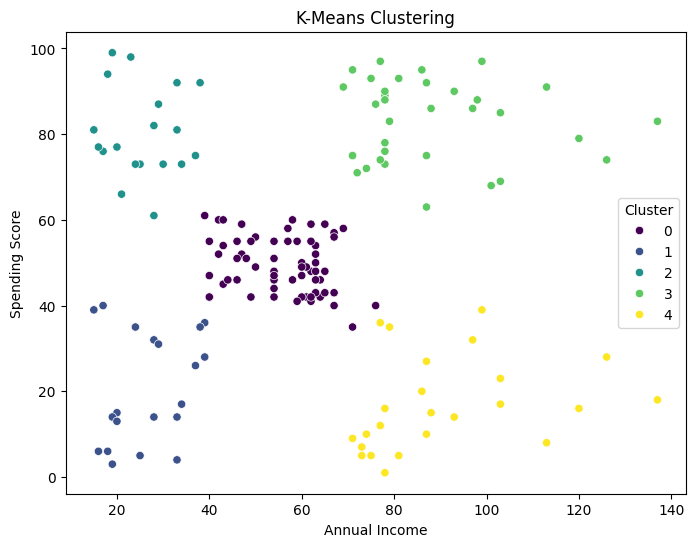

In [12]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_train['Annual Income (k$)'], y=X_train['Spending Score (1-100)'], hue=X_train['Cluster'], palette='viridis')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('K-Means Clustering')
plt.show()

In [13]:
# Assign clusters to test data
X_test['Cluster'] = kmeans.predict(X_test[['Annual Income (k$)', 'Spending Score (1-100)']])

# Creating a Confusion Matrix approximation
cm = confusion_matrix(X_test['Cluster'], kmeans.predict(X_test[['Annual Income (k$)', 'Spending Score (1-100)']]))
print("Confusion Matrix (Approximation):")
print(cm)

Confusion Matrix (Approximation):
[[18  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  5  0]
 [ 0  0  0  0 11]]


<Figure size 600x600 with 0 Axes>

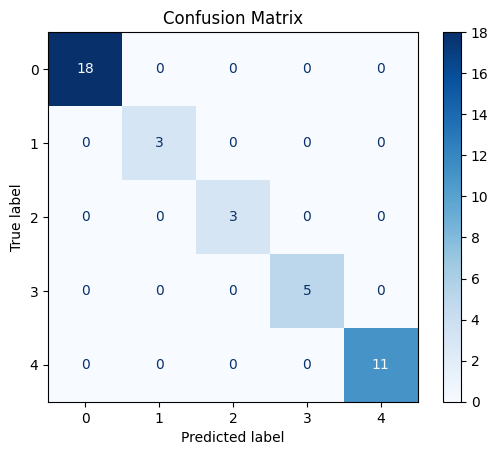

In [14]:
plt.figure(figsize=(6,6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [15]:
cv_scores = cross_val_score(KMeans(n_clusters=5, random_state=42), X_train[['Annual Income (k$)', 'Spending Score (1-100)']], cv=5)
print("Cross-validation scores for K-Means:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

Cross-validation scores for K-Means: [ -8502.87787616  -8613.62159628 -10811.75345553 -14082.27649366
  -9548.19693592]
Mean CV Score: -10311.745271509073
